# Lab #5

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor, TweedieRegressor, SGDRegressor, LassoLars
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, BaggingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score

## Exploratory Analysis

### Import the Dataset

In [49]:
df = pd.read_csv("./data/American_Housing_Data.csv")
df['Zip Code'] = df['Zip Code'].astype(str)
print(df.columns)
df

Index(['Zip Code', 'Price', 'Beds', 'Baths', 'Living Space', 'Address', 'City',
       'State', 'Zip Code Population', 'Zip Code Density', 'County',
       'Median Household Income', 'Latitude', 'Longitude'],
      dtype='object')


,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39974,98199,2495000.0,4,4,3380,2626 27TH AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39975,98199,2295000.0,4,4,2878,3215 32ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39976,98199,950000.0,3,2,1380,3257 22ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39977,98199,425000.0,2,1,856,3711 26TH PL W APT 102,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


### Plot the relationships

- You can change x_axis with other columns to see the relationship

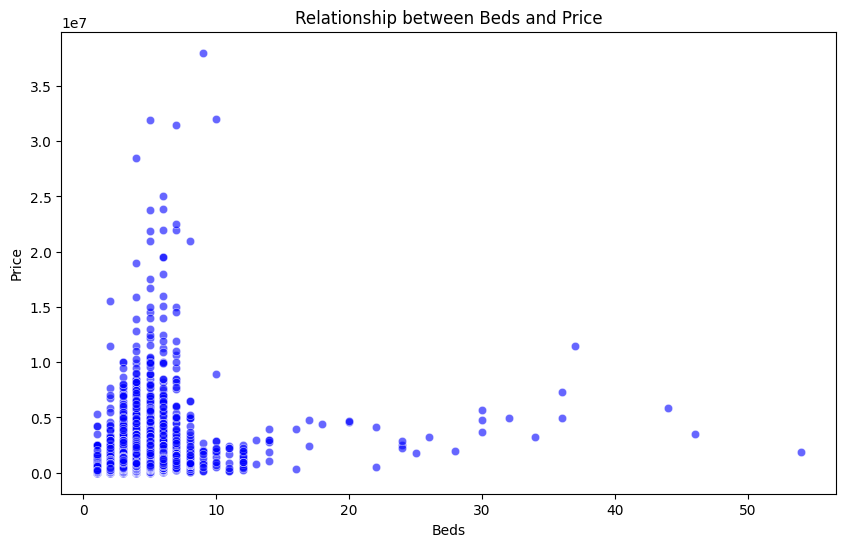

In [50]:
x_axis = 'Beds'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y='Price', data=df, color='blue', alpha=0.6)
plt.title(f'Relationship between {x_axis} and Price')
plt.xlabel(f'{x_axis}')
plt.ylabel('Price')
plt.show()

## Model Training

#### Decide which columns to use for predicting the price:

('Zip Code', 'Beds', 'Baths', 'Living Space', 'Address', 'City', 'State', 'Zip Code Population', 'Zip Code Density', 'County', 'Median Household Income', 'Latitude', 'Longitude')

In [51]:
columns = ['Zip Code', 'Price', 'Beds', 'Baths', 'Living Space', 'Address', 'City', 'State', 'Zip Code Population', 'Zip Code Density', 'County', 'Median Household Income', 'Latitude', 'Longitude']
df = df[columns]
df.dtypes

Zip Code                    object
Price                      float64
Beds                         int64
Baths                        int64
Living Space                 int64
Address                     object
City                        object
State                       object
Zip Code Population          int64
Zip Code Density           float64
County                      object
Median Household Income    float64
Latitude                   float64
Longitude                  float64
dtype: object

#### Decide whether using a Scaler for numeric columns

In [52]:
print('Numerical columns:', df.select_dtypes(include=[np.number]).columns.tolist())

Numerical columns: ['Price', 'Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude']


In [54]:
scaler = StandardScaler()
# scaler = MinMaxScaler()

numeric_data = df.select_dtypes(include=[np.number])
numeric_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)
numeric_data['Price'] = df['Price']

# update original df with the scaled data (delete if you don't want to use scaler)
df[df.select_dtypes(include=[np.number]).columns] = numeric_data 
df

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,0.018868,0.030769,0.026433,74 GRAND ST APT 3,New York,New York,0.253577,0.359713,New York,0.392529,0.680984,0.993889
1,10013,3999000.0,0.018868,0.030769,0.026433,74 GRAND ST APT 3,New York,New York,0.253577,0.359713,New York,0.392529,0.680984,0.993889
2,10014,1650000.0,0.000000,0.000000,0.009632,140 CHARLES ST APT 4D,New York,New York,0.255742,0.407286,New York,0.254839,0.681622,0.993862
3,10014,760000.0,0.037736,0.015385,0.020662,38 JONES ST,New York,New York,0.255742,0.407286,New York,0.254839,0.681622,0.993862
4,10014,1100000.0,0.000000,0.000000,0.008044,81 BEDFORD ST APT 3F,New York,New York,0.255742,0.407286,New York,0.254839,0.681622,0.993862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39974,98199,2495000.0,0.056604,0.046154,0.045441,2626 27TH AVE W,Seattle,Washington,0.196264,0.035791,King,0.204114,0.995867,0.008645
39975,98199,2295000.0,0.056604,0.046154,0.038688,3215 32ND AVE W,Seattle,Washington,0.196264,0.035791,King,0.204114,0.995867,0.008645
39976,98199,950000.0,0.037736,0.015385,0.018537,3257 22ND AVE W,Seattle,Washington,0.196264,0.035791,King,0.204114,0.995867,0.008645
39977,98199,425000.0,0.018868,0.000000,0.011488,3711 26TH PL W APT 102,Seattle,Washington,0.196264,0.035791,King,0.204114,0.995867,0.008645


#### Decide whether using Encoder for categorical columns

In [55]:
print('Categorical columns:', df.select_dtypes(include=[np.object_]).columns.tolist())

Categorical columns: ['Zip Code', 'Address', 'City', 'State', 'County']


In [56]:
encoder = OrdinalEncoder()

categorical_data = df.select_dtypes(include=[np.object_])
encoded_data = encoder.fit_transform(categorical_data)
encoded_df = pd.DataFrame(encoded_data, columns=categorical_data.columns)

# update original df with the encoded data (delete if you don't want to use encoder)
df[df.select_dtypes(include=[np.object_]).columns] = encoded_df
df

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,0.0,3999000.0,0.018868,0.030769,0.026433,33466.0,150.0,18.0,0.253577,0.359713,57.0,0.392529,0.680984,0.993889
1,0.0,3999000.0,0.018868,0.030769,0.026433,33466.0,150.0,18.0,0.253577,0.359713,57.0,0.392529,0.680984,0.993889
2,1.0,1650000.0,0.000000,0.000000,0.009632,5888.0,150.0,18.0,0.255742,0.407286,57.0,0.254839,0.681622,0.993862
3,1.0,760000.0,0.037736,0.015385,0.020662,20577.0,150.0,18.0,0.255742,0.407286,57.0,0.254839,0.681622,0.993862
4,1.0,1100000.0,0.000000,0.000000,0.008044,35129.0,150.0,18.0,0.255742,0.407286,57.0,0.254839,0.681622,0.993862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39974,1731.0,2495000.0,0.056604,0.046154,0.045441,14873.0,204.0,27.0,0.196264,0.035791,46.0,0.204114,0.995867,0.008645
39975,1731.0,2295000.0,0.056604,0.046154,0.038688,18031.0,204.0,27.0,0.196264,0.035791,46.0,0.204114,0.995867,0.008645
39976,1731.0,950000.0,0.037736,0.015385,0.018537,18322.0,204.0,27.0,0.196264,0.035791,46.0,0.204114,0.995867,0.008645
39977,1731.0,425000.0,0.018868,0.000000,0.011488,20269.0,204.0,27.0,0.196264,0.035791,46.0,0.204114,0.995867,0.008645


In [57]:
X = df.drop('Price', axis=1).drop(df.select_dtypes(include=[np.object_]).columns, axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- You can find the details about the models from https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [58]:
#### Linear Models

model = LinearRegression()
# model = Ridge(alpha=0.5)
# model = Lasso(alpha=0.1)
# model = LassoLars(alpha=0.1)
# model = ElasticNet(alpha=0.1, l1_ratio=0.5)
# model = BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06)
# model = HuberRegressor(epsilon=1.35, alpha=0.0001)
# model = TweedieRegressor(alpha=1.0, power=0.0)

#### Ensemble multiple linear models

# model = RandomForestRegressor(n_estimators=5)
# model = BaggingRegressor(estimator=LinearSVR(), n_estimators=5)
# model = VotingRegressor(estimators=[('m1', BayesianRidge()), ('m2', Ridge()), ('m3', ElasticNet())])


#### Multi-layer Perceptron

# model = MLPRegressor(hidden_layer_sizes=(32, 16, 8), max_iter=200, verbose=True, learning_rate='adaptive', learning_rate_init=0.01)

# ------------------------------------------------------------ #
# ------------------------------------------------------------ #

#### Training and evaluation
print('Model:', model)
print('Training started. Please wait...')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Mean Absolute Error: {np.mean(np.abs(y_test - y_pred))}')
print(f'Score: {r2_score(y_test, y_pred)}')

Model: LinearRegression()
Training started. Please wait...
Mean Absolute Error: 303302.0113905931
Score: 0.401838366024555


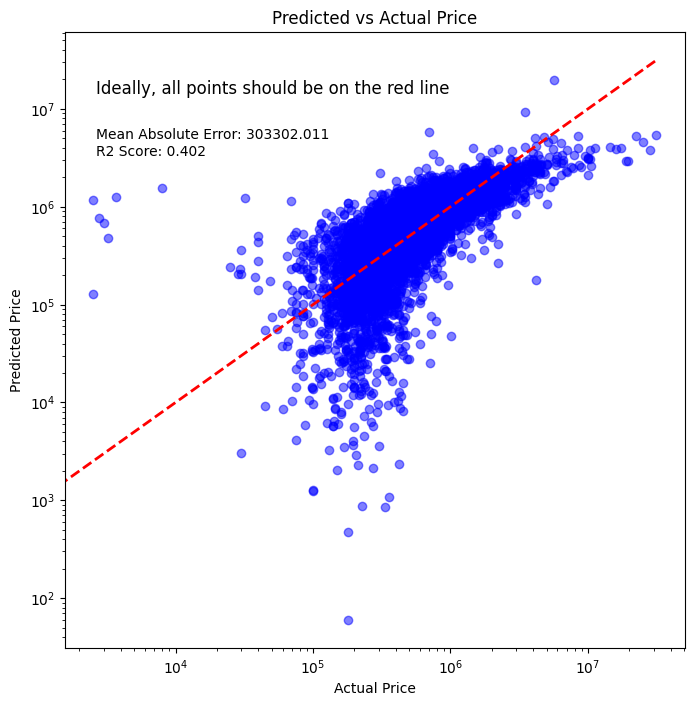

In [59]:
scores = {
    "Mean Absolute Error": np.mean(np.abs(y_test - y_pred)),
    "R2 Score": r2_score(y_test, y_pred),
}

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([0, max(y_test.max(), y_pred.max())], [0, max(y_test.max(), y_pred.max())], color='red', linewidth=2, linestyle='--')
plt.text(0.05, 0.9, f'Ideally, all points should be on the red line', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.05, 0.8, '\n'.join([f'{k}: {v:.3f}' for k, v in scores.items()]), fontsize=10, transform=plt.gca().transAxes)
plt.title('Predicted vs Actual Price')
plt.ylabel('Predicted Price')
plt.xlabel('Actual Price')
plt.xscale('log')
plt.yscale('log')
plt.show()

## Submit your model and score:

https://forms.gle/PpT9H7LP6UMRD3MK8